# Final Project: Sale-Data Analysis
---
Họ tên học viên: Nguyễn Xuân Hoàng

Email: Hoangk63hust@gmail.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
print('Numpy version: ', np.__version__)
print('Pandas version:', pd.__version__)

Numpy version:  1.21.5
Pandas version: 1.4.2


### 1.  Doanh số bán hàng và lợi nhuận theo từng năm


In [3]:
 df_orders = pd.read_excel('Data/Data_sales_2011_2014.xlsx',
                          sheet_name = 'Orders')

In [4]:
df_orders.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [5]:
year = df_orders['year'].unique()
year

array([2011, 2012, 2013, 2014], dtype=int64)

In [6]:
sales_sum = df_orders['sales'].groupby(df_orders['year']).sum()
sales_sum

year
2011    2.259451e+06
2012    2.677439e+06
2013    3.405746e+06
2014    4.299866e+06
Name: sales, dtype: float64

In [7]:
profit_sum = df_orders['profit'].groupby(df_orders['year']).sum()
profit_sum

year
2011    248940.81154
2012    307415.27910
2013    408512.76018
2014    504165.97046
Name: profit, dtype: float64

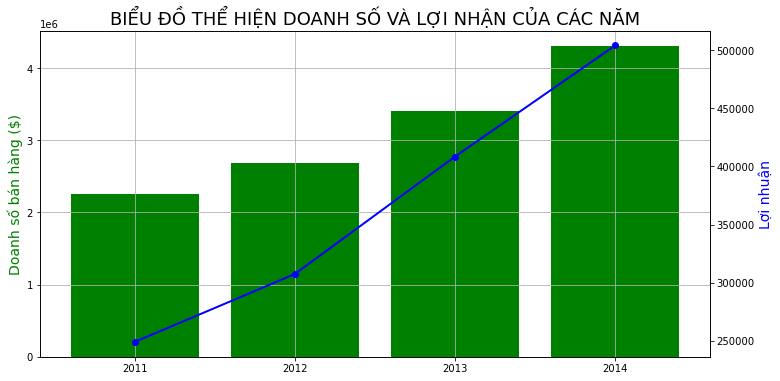

In [8]:
plt.figure(figsize = (12,6))

plt.grid()
#Tạo biểu đồ doanh số bán hàng - bar chart
plt.bar(year, sales_sum.values, color = 'g')
plt.ylabel('Doanh số bán hàng ($)',
           color = 'green',
           fontdict = {'fontsize':14})

plt.twinx() #Tạo trục y thứ 2

#Tạo biểu đồ lợi nhuận sử dụng line chart
plt.plot(year, profit_sum.values, 'b-o', lw = 2)

plt.ylabel('Lợi nhuận',
           color = 'blue',
           fontdict = {'fontsize':14})

plt.title('BIỂU ĐỒ THỂ HIỆN DOANH SỐ VÀ LỢI NHẬN CỦA CÁC NĂM',
         fontdict = {'fontsize':18})

plt.xticks(year)
plt.show()

* Nhận xét:
Lợi nhuận và doanh số bán hàng đều tăng theo các năm


### 2. Thống kê doanh số bán hàng theo từng tháng 

In [10]:
df_orders['month_year'] = pd.to_datetime(df_orders['order_date']).dt.to_period('M')
df_orders.head(3)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01


In [11]:
sales_per_months = df_orders['sales'].groupby(df_orders['month_year']).sum()
sales_per_month = [str(i) for i in sales_per_months.index]

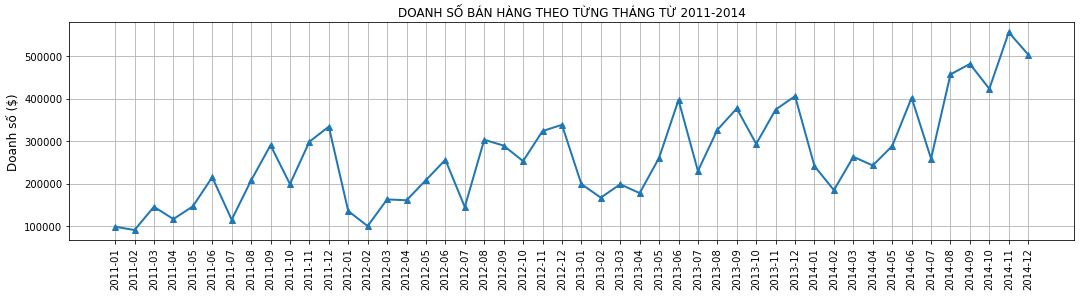

In [12]:
plt.figure (figsize = (18,4))

plt.plot(sales_per_month, 
         sales_per_months.values, 
         '^-', 
         lw = 2  )

plt.ylabel('Doanh số ($)', fontsize = 12)
plt.xticks(sales_per_month, rotation = 90)
plt.title('DOANH SỐ BÁN HÀNG THEO TỪNG THÁNG TỪ 2011-2014')
plt.grid()

plt.show()

* Nhận xét:
Doanh số bán hàng dường như tăng mạnh trong các tháng cuối năm của các năm hơn là các tháng đầu năm

In [13]:
df_orders['month'] = df_orders['order_date'].dt.month


In [14]:
sales_per_months_years = df_orders['sales'].groupby([df_orders['year'], df_orders['month']]).sum()

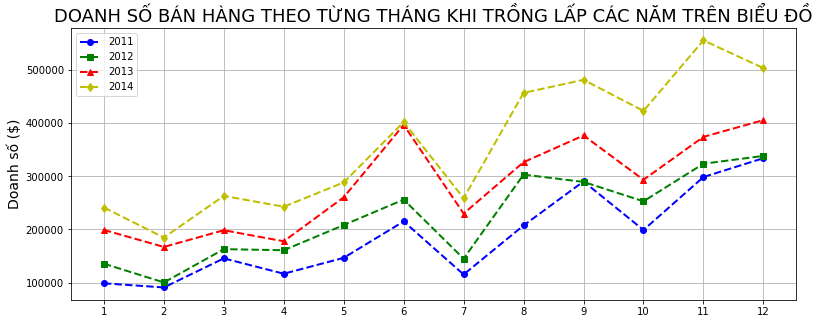

In [21]:
plt.figure(figsize = (13,5))

xlabel = np.arange(1,13)



plt.plot(xlabel, sales_per_months_years[2011,:], 'b--o', lw = 2, label = '2011')
plt.plot(xlabel, sales_per_months_years[2012,:], 'g--s', lw = 2, label = '2012')
plt.plot(xlabel, sales_per_months_years[2013,:], 'r--^', lw = 2, label = '2013')
plt.plot(xlabel, sales_per_months_years[2014,:], 'y--d', lw = 2, label = '2014')
plt.ylabel('Doanh số ($)',
           fontdict = {'fontsize':14})

plt.title('DOANH SỐ BÁN HÀNG THEO TỪNG THÁNG KHI TRỒNG LẤP CÁC NĂM TRÊN BIỂU ĐỒ',
         fontdict = {'fontsize':18})
plt.xticks(xlabel)
plt.grid()
plt.legend()
plt.show()

#### * Nhận xét:
Các tháng cuối năm đều cho thấy doanh số bán hàng cao hơn, năm 2014 là cao nhất

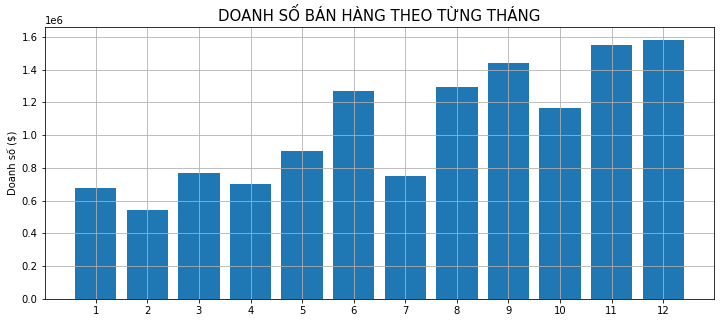

In [23]:
sales_per_month2 = df_orders['sales'].groupby(df_orders['month']).sum()
sales_per_month2
plt.figure(figsize = (12,5))
#bar chart:
bar = plt.bar(sales_per_month2.index,sales_per_month2.values)

plt.ylabel('Doanh số ($)')
plt.xticks(np.arange(1,13))
plt.title('DOANH SỐ BÁN HÀNG THEO TỪNG THÁNG', fontsize = 15)
plt.grid()
plt.show()

* Nhận xét:
Tháng 2 có doanh số bán hàng thấp nhất, tháng 12 là cao nhất

### 3. Doanh số bán hàng theo từng thị trường 

In [24]:

sales_per_market = df_orders['sales'].groupby(df_orders['market']).sum()

sales_per_market.sort_values(inplace = True)

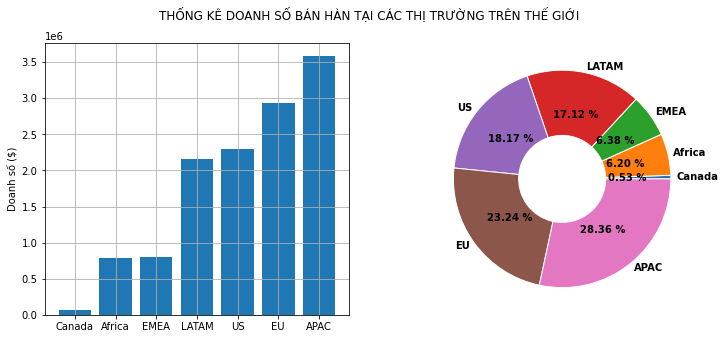

In [46]:
plt.figure(figsize = (12,5))

#bar chart:
plt.subplot(121)
bar = plt.bar(sales_per_market.index,sales_per_market.values)
plt.grid()
plt.ylabel('Doanh số ($)')
#donus graph
plt.subplot(122)
plt.pie(sales_per_market.values,
        labels = sales_per_market.index,        
        textprops={'color':'k','fontweight':'bold'},
        rotatelabels=False,
        labeldistance=1.05,
        wedgeprops=dict(width=0.6,edgecolor='w'), #Xác định độ rộng của Pie
        autopct='%.2f %%', 
        pctdistance=0.6)
plt.suptitle('THỐNG KÊ DOANH SỐ BÁN HÀN TẠI CÁC THỊ TRƯỜNG TRÊN THẾ GIỚI')
plt.show()

* Nhận xét:
Doanh số tại thị trường APAC chiếm số phần trăm lớn nhất, tại Canada là nhỏ nhất

### 4. Doanh số bán hàng và lợi nhuận theo nhóm khách hàng

In [47]:
sales_per_segment = df_orders['sales'].groupby(df_orders['segment']).sum()

profit_per_segment = df_orders['profit'].groupby(df_orders['segment']).sum()

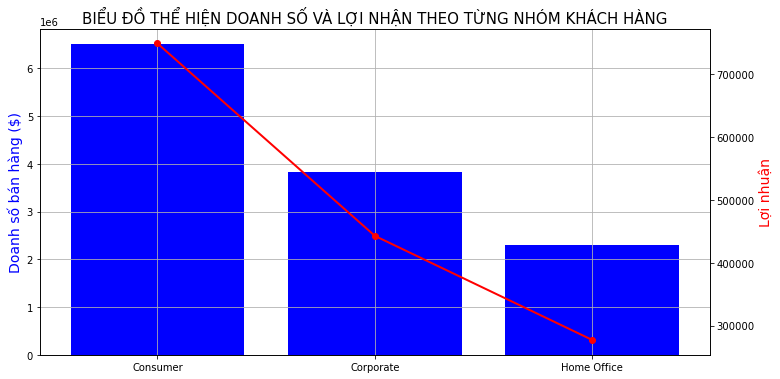

In [28]:
plt.figure(figsize = (12,6))

plt.grid()
#Tạo biểu đồ doanh số bán hàng - bar chart
plt.bar(sales_per_segment.index, sales_per_segment.values, color = 'b')
plt.ylabel('Doanh số bán hàng ($)',
           color = 'b',
           fontdict = {'fontsize':14})

plt.twinx() #Tạo trục y thứ 2

#Tạo biểu đồ lợi nhuận sử dụng line chart
plt.plot(profit_per_segment.index, profit_per_segment.values, 'r-o', lw = 2)

plt.ylabel('Lợi nhuận',
           color = 'r',
           fontdict = {'fontsize':14})

plt.title('BIỂU ĐỒ THỂ HIỆN DOANH SỐ VÀ LỢI NHẬN THEO TỪNG NHÓM KHÁCH HÀNG',
         fontdict = {'fontsize':15})
plt.show()

* Nhận xét:
Nhóm Consumer cho doanh số và lợi nhuận bán hàng cao nhất, thấp nhất là nhóm Home Office

### 5.TOP 10 
1. Quốc gia mua hàng nhiều nhất 
2. Mặt hàng có doanh số bán hàng cao nhất
3. Mặt hàng có số lượng bán nhiều nhất
4. Khách hàng mua nhiều nhất



In [48]:
sales_per_country = df_orders['sales'].groupby(df_orders['country']).sum()
sales_per_country.sort_values(inplace = True, ascending = False)
sales_per_country
top10_country = sales_per_country[:10]

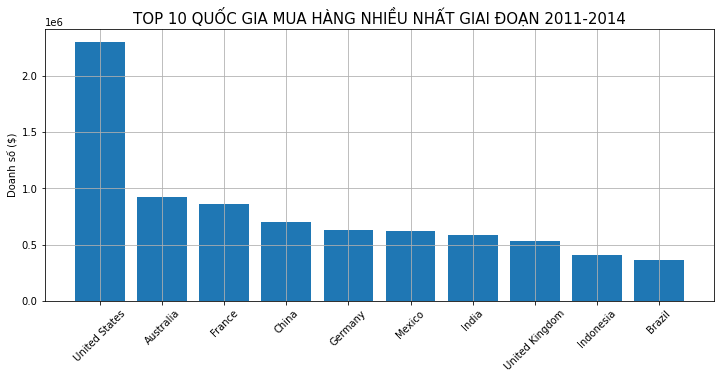

In [49]:
plt.figure(figsize = (12,5))

plt.bar(top10_country.index, top10_country.values)

plt.ylabel('Doanh số ($)')
plt.xticks(top10_country.index,  rotation = 45)
plt.title('TOP 10 QUỐC GIA MUA HÀNG NHIỀU NHẤT GIAI ĐOẠN 2011-2014', fontsize = 15)
plt.grid()
plt.show()


* Nhận xét:
     - Mỹ có doanh số bán hàng cao nhất

In [50]:
 #5: TOP 10 mặt hàng có doanh số bán hàng cao nhất?
sales_per_product = df_orders['sales'].groupby(df_orders['product_name']).sum()
sales_per_product.sort_values(inplace = True, ascending = False)
top10_product = sales_per_product[:10]
# top10_product = top10_product[::-1]

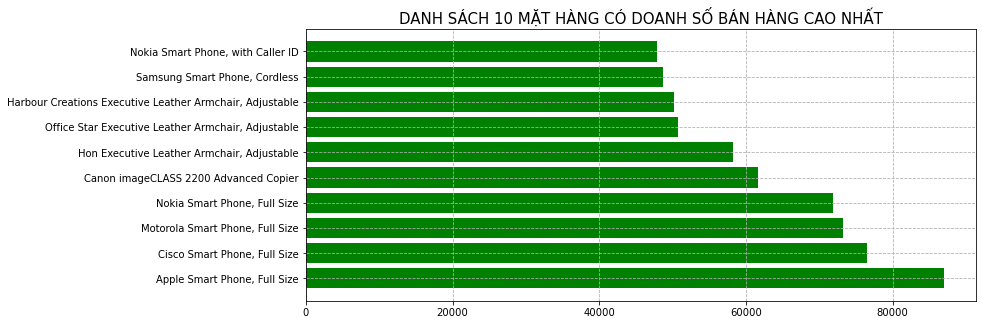

In [51]:
plt.figure(figsize = (12,5))

plt.barh(top10_product.index, top10_product.values, color = 'g')

plt.title('DANH SÁCH 10 MẶT HÀNG CÓ DOANH SỐ BÁN HÀNG CAO NHẤT', fontsize = 15)
plt.grid(ls = '--')

# ax = plt.gca()
# ax.invert_yaxis()

plt.show()

* Nhận xét: Apple Smart Phone là mặt hàng có doanh số bán hàng cao nhất

In [52]:
#TOP 10 mặt hàng có số lượng bán nhiều nhất?

product_count =df_orders['quantity'].groupby(df_orders['product_name']).sum() 
product_count.sort_values(ascending = False, inplace = True )

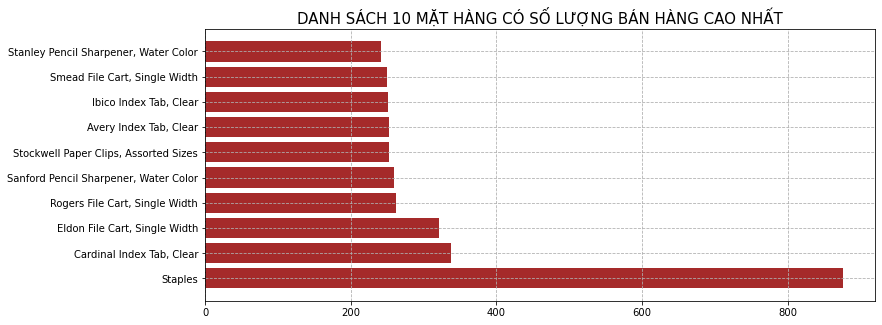

In [53]:
plt.figure(figsize = (12,5))

plt.barh(product_count[:10].index, product_count.values[:10], color = 'brown')

plt.title('DANH SÁCH 10 MẶT HÀNG CÓ SỐ LƯỢNG BÁN HÀNG CAO NHẤT', fontsize = 15)
plt.grid(ls = '--')

# ax = plt.gca()
# ax.invert_yaxis()

plt.show()

* Nhận xét: Staples là mặt hàng có số lượng bán hàng cao nhất

In [35]:
#TOP 10 khách hàng mua nhiều nhất?

customer_per_sales = df_orders.groupby(['customer_name','segment', 'country', 'state']).sum()
customer_per_sales.sort_values(by = 'sales', ascending = False, inplace = True)
customer_per_sales.iloc[:10,:1]

,,,,sales
customer_name,segment,country,state,
Sean Miller,Home Office,United States,Florida,23661.228
Tamara Chand,Corporate,United States,Indiana,18336.740
Raymond Buch,Consumer,United States,Washington,14052.480
Tom Ashbrook,Home Office,United States,New York,13723.498
Becky Martin,Consumer,United States,Texas,10539.896
Hunter Lopez,Consumer,United States,Delaware,10499.970
Sanjit Chand,Consumer,United States,Minnesota,9900.190
Adrian Barton,Consumer,United States,Michigan,9892.740
Barry Franz,Home Office,India,Haryana,9266.580


### 6: Thống kê Doanh số và Lợi nhuận theo từng nhóm sản phẩm

In [54]:
sales_per_category = df_orders['sales'].groupby(df_orders['category']).sum()

profit_per_category = df_orders['profit'].groupby(df_orders['category']).sum()

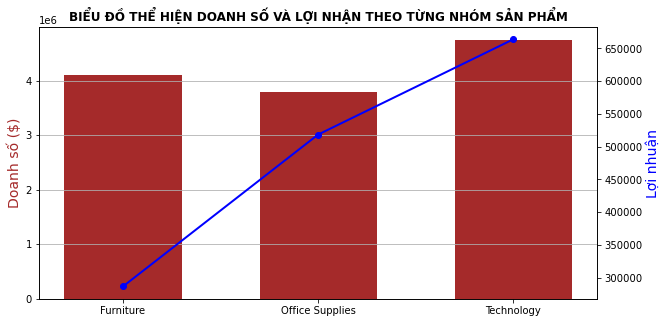

In [37]:

plt.figure(figsize = (10,5))


#Tạo biểu đồ doanh số bán hàng - bar chart
plt.bar(sales_per_category.index,
        sales_per_category.values,
        color = 'brown',
        width = 0.6)
plt.ylabel('Doanh số ($)',
           color = 'brown',
           fontdict = {'fontsize':14})
plt.grid(axis = 'y')
plt.twinx() #Tạo trục y thứ 2

#Tạo biểu đồ lợi nhuận sử dụng line chart
plt.plot(profit_per_category.index, profit_per_category, 'b-o', lw = 2)

plt.ylabel('Lợi nhuận',
           color = 'b',
           fontdict = {'fontsize':14})

plt.title('BIỂU ĐỒ THỂ HIỆN DOANH SỐ VÀ LỢI NHẬN THEO TỪNG NHÓM SẢN PHẨM',
         fontdict = {'fontsize':12, 'weight':'bold'})

plt.show()

* Nhận xét: Nhóm sản phẩm công nghệ cho doanh số và lợi nhuận cao nhất, đồ nội thất cho thấp nhất

In [38]:
df_furniture = df_orders[df_orders['category'] == 'Furniture']
sales_furniture = df_furniture['sales'].groupby(df_furniture['sub_category']).sum()
sales_furniture

sub_category
Bookcases      1.466572e+06
Chairs         1.501682e+06
Furnishings    3.855783e+05
Tables         7.570419e+05
Name: sales, dtype: float64

In [39]:
profit_furniture = df_furniture['profit'].groupby(df_furniture['sub_category']).sum()
profit_furniture

sub_category
Bookcases      161924.4195
Chairs         141973.7975
Furnishings     46967.4255
Tables         -64083.3887
Name: profit, dtype: float64

In [ ]:
# sales_per_subcategory = df_orders['sales'].groupby([df_orders['category'],df_orders['sub_category']] ).sum()

# profit_per_subcategory = df_orders['profit'].groupby([df_orders['category'],df_orders['sub_category']] ).sum()
# sales_per_subcategory

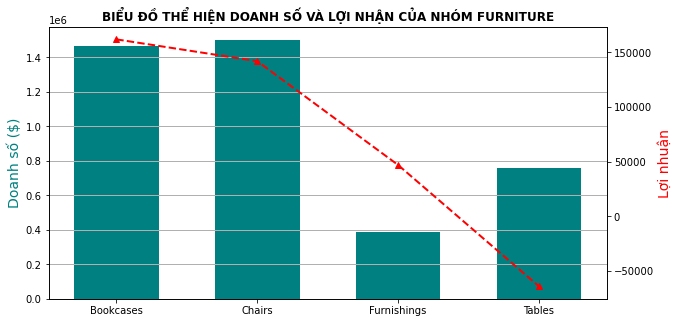

In [40]:
plt.figure(figsize = (10,5))


#Tạo biểu đồ doanh số bán hàng - bar chart
plt.bar(sales_furniture.index,
        sales_furniture.values,
        color = 'teal',
        width = 0.6)
plt.ylabel('Doanh số ($)',
           color = 'teal',
           fontdict = {'fontsize':14})
plt.grid(axis = 'y', lw = 1)
plt.twinx() #Tạo trục y thứ 2

#Tạo biểu đồ lợi nhuận sử dụng line chart
plt.plot(profit_furniture.index, profit_furniture.values, 'r--^', lw = 2)

plt.ylabel('Lợi nhuận',
           color = 'r',
           fontdict = {'fontsize':14})

plt.title('BIỂU ĐỒ THỂ HIỆN DOANH SỐ VÀ LỢI NHẬN CỦA NHÓM FURNITURE',
         fontdict = {'fontsize':12, 'weight':'bold'})

plt.show()

* Nhận xét: Trong nhóm các sản phẩm nội thất, Chairs là mặt hàng cho doanh số và lợi nhuận cao nhất, thấp nhát là Furnishings

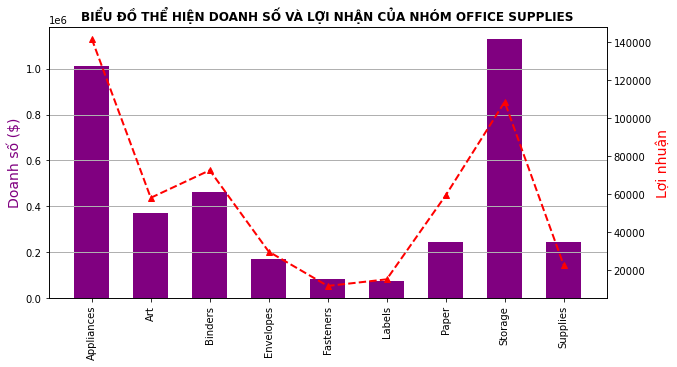

In [41]:
df_office_supplies = df_orders[df_orders['category'] == 'Office Supplies']
sales_office_supplies = df_office_supplies['sales'].groupby(df_office_supplies['sub_category']).sum()
profit_office_supplies =df_office_supplies['profit'].groupby(df_office_supplies['sub_category']).sum()

plt.figure(figsize = (10,5))


#Tạo biểu đồ doanh số bán hàng - bar chart
plt.bar(sales_office_supplies.index,
       sales_office_supplies.values,
        color = 'purple',
        width = 0.6)
plt.ylabel('Doanh số ($)',
           color = 'purple',
           fontdict = {'fontsize':14})
plt.grid(axis = 'y', lw = 1)
plt.xticks(rotation = 90)
plt.twinx() #Tạo trục y thứ 2

#Tạo biểu đồ lợi nhuận sử dụng line chart
plt.plot(profit_office_supplies.index, profit_office_supplies.values, 'r--^', lw = 2)

plt.ylabel('Lợi nhuận',
           color = 'r',
           fontdict = {'fontsize':14})

plt.title('BIỂU ĐỒ THỂ HIỆN DOANH SỐ VÀ LỢI NHẬN CỦA NHÓM OFFICE SUPPLIES',
         fontdict = {'fontsize':12, 'weight':'bold'})
plt.show()

* Nhận xét: Trong nhóm các vật dụng văn phòng, mặt hàng Storage cho doanh số cao nhất

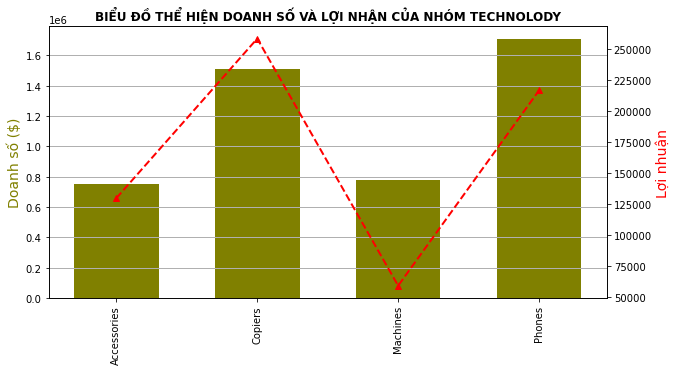

In [42]:
df_tech= df_orders[df_orders['category'] == 'Technology']
sales_tech = df_tech['sales'].groupby(df_tech['sub_category']).sum()
profit_tech =df_tech['profit'].groupby(df_tech['sub_category']).sum()

plt.figure(figsize = (10,5))


#Tạo biểu đồ doanh số bán hàng - bar chart
plt.bar(sales_tech.index,
       sales_tech.values,
        color = 'olive',
        width = 0.6)
plt.ylabel('Doanh số ($)',
           color = 'olive',
           fontdict = {'fontsize':14})
plt.grid(axis = 'y', lw = 1)
plt.xticks(rotation = 90)
plt.twinx() #Tạo trục y thứ 2

#Tạo biểu đồ lợi nhuận sử dụng line chart
plt.plot(profit_tech.index,profit_tech.values, 'r--^', lw = 2)

plt.ylabel('Lợi nhuận',
           color = 'r',
           fontdict = {'fontsize':14})

plt.title('BIỂU ĐỒ THỂ HIỆN DOANH SỐ VÀ LỢI NHẬN CỦA NHÓM TECHNOLODY',
         fontdict = {'fontsize':12, 'weight':'bold'})
plt.show()

* Nhận xét: Trong nhóm đồ công nghệ, điện thoại là mặt hàng cho doanh số cao nhất, thâp nhất là máy móc (machines)

### 7: Một số thông tin về thị trường Việt Nam


In [43]:

df_vn = df_orders[df_orders.country == 'Vietnam']
vn_sales_years = df_vn['sales'].groupby(df_vn['year']).sum()
vn_sales_city = df_vn['sales'].groupby(df_vn['state']).sum()

DOANH SỐ BÁN HÀNG VÀ LỢI NHUẬN: 
 Sales: 65800.1994 
 Profits: -1870.2306


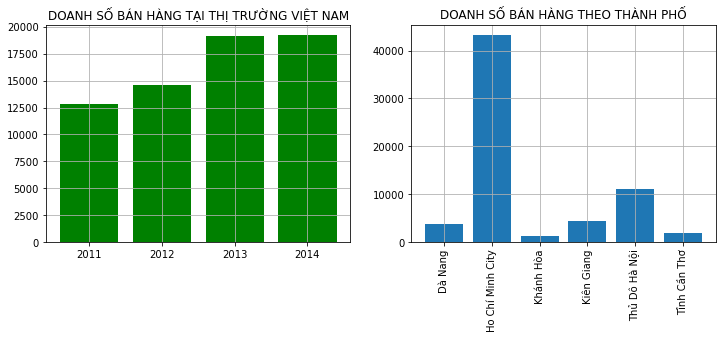

In [44]:
print('DOANH SỐ BÁN HÀNG VÀ LỢI NHUẬN: \n Sales:', df_vn['sales'].sum(), '\n Profits:',round(df_vn['profit'].sum(),4) )

plt.figure(figsize = (12,4))

#bar chart1:
plt.subplot(121)
bar = plt.bar(vn_sales_years.index,vn_sales_years.values, color = 'g')
plt.title('DOANH SỐ BÁN HÀNG TẠI THỊ TRƯỜNG VIỆT NAM')
plt.xticks(vn_sales_years.index)
plt.grid()

#bar chat 2:
plt.subplot(122)
bar = plt.bar(vn_sales_city.index,vn_sales_city.values)
plt.title('DOANH SỐ BÁN HÀNG THEO THÀNH PHỐ')
plt.xticks(vn_sales_city.index, rotation = 90)
plt.grid()


plt.show()

* Nhận xét: Tại thị trường Việt Nam, cùng với xu hướng chung doanh số tăng theo từng năm, tuy nhiên lợi nhuận tổng của 4 năm đang âm. Thành phố có doanh số bán hàng cao nhất là Tp Hồ Chí Minh.